<a id='intro'></a>
## Introduction
## Table of Contents
<ol>
<li><a href="#Explore">Data Exploration</a></li>
<li><a href="#processing">Data Processing</a></li>
<li><a href="#ML">ML Model</a></li>
<li><a href="#Trial">2019 Trial</a></li>
</ol>

<a id='Explore'></a>
## 1. Data Exploration

 > Import Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

> read data with no lag

In [69]:
path = 'E:/Business Excellence/Bi Projects/PR and PO/Prices Predection/Model no lag.csv'
df= pd.read_csv(path,parse_dates=['Date'],dayfirst=True)
df

,Date,CPI,PPI,Lending rate,Forgein Reserves,Exchange rate,Unemployment rate,GDP,Cement,Steel,Ramdan_start,Ramdan_end,Ramdan_start.1,Ramdan_end.1
0,2010-06-01,33.8,81.4,0.111,35221,5.687318,8.960000,692.520000,26.09,3690,10-08-10,09-09-10,0,0
1,2010-07-01,34.8,83.0,0.111,35278,5.707865,8.940000,702.366667,27.40,3680,10-08-10,09-09-10,0,0
2,2010-08-01,35.8,85.3,0.109,35527,5.702930,8.920000,712.213333,27.17,3748,10-08-10,09-09-10,1,0
3,2010-09-01,36.4,88.0,0.109,35534,5.712700,8.900000,722.060000,27.25,4083,10-08-10,09-09-10,0,1
4,2010-10-01,36.8,91.5,0.110,35545,5.736695,8.900000,716.640000,26.91,3920,10-08-10,09-09-10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2019-11-01,104.6,200.9,0.144,45354,16.188826,7.933333,1017.833333,47.00,10885,05-05-19,03-06-19,0,0
114,2019-12-01,104.4,205.1,0.138,45420,16.146052,8.000000,1024.400000,47.00,10978,05-05-19,03-06-19,0,0
115,2020-01-01,105.2,203.1,0.136,45457,15.941435,7.900000,1012.933333,45.00,10849,NaN,NaN,0,0
116,2020-02-01,105.2,196.7,0.138,45510,15.740675,7.800000,1001.466667,45.00,10849,NaN,NaN,0,0


In [57]:
path = 'E:/Business Excellence/Bi Projects/PR and PO/Prices Predection/Model no lag.csv'
df= pd.read_csv(path,parse_dates=['Date'],dayfirst=True)
#data Processing 
Shift = 3
predict = 3
#split 
features= df.iloc[:,1:8]
labels = df.iloc[:,9]
#shift
features = features.shift(periods=shift)
#merge
result = pd.concat([features, labels], axis=1, sort=False)
#drop the Nulls
result = result.dropna()
#delete the bottow predict rows 
result.drop(result.tail(predict).index,inplace=True)
validation =result.iloc[-predict:]

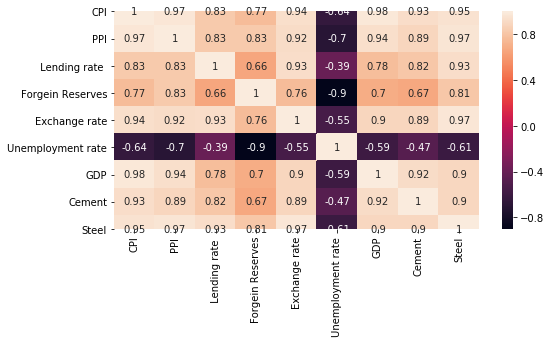

In [64]:
#correlation plot with no lag
path = 'E:/Business Excellence/Bi Projects/PR and PO/Prices Predection/Model no lag.csv'
df= pd.read_csv(path)
#Ramdan nor the seasonality(year,month) had no signficant impact on the prices of steel or cement
df.drop(['Ramdan_start', 'Ramdan_end', 'Ramdan_start.1', 'Ramdan_end.1'], axis=1, inplace=True)
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()


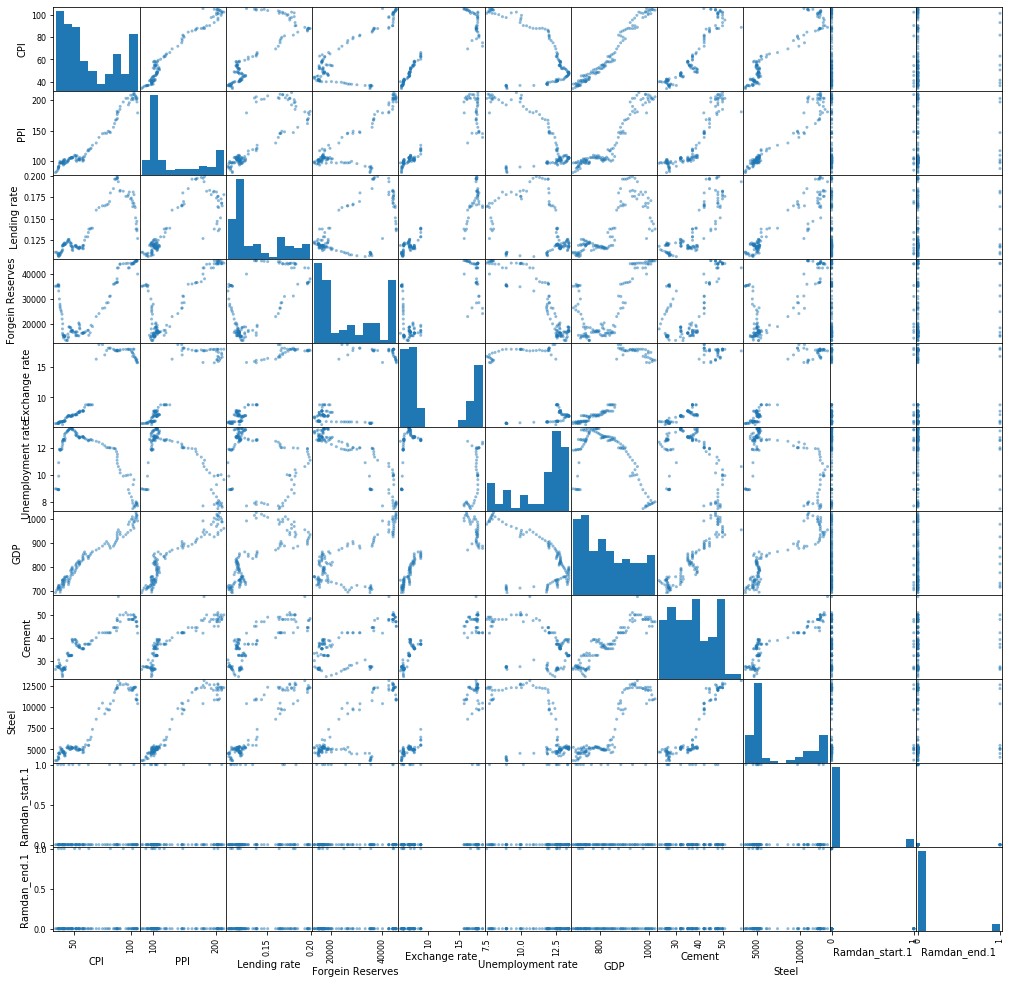

In [75]:
pd.plotting.scatter_matrix(df,figsize=(17,17));

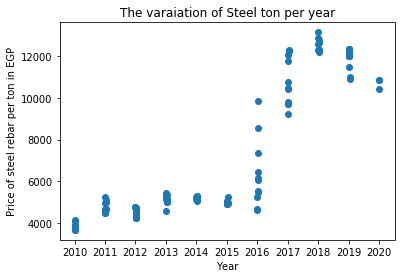

In [86]:
#@2016 and @2017 the price was very volitaile and showed a stability afterwards
dates = matplotlib.dates.date2num(df['Date'])
matplotlib.pyplot.plot_date(dates, df['Steel']);
plt.ylabel('Price of steel rebar per ton in EGP');
plt.xlabel('Year');
plt.title('The varaiation of Steel ton per year');



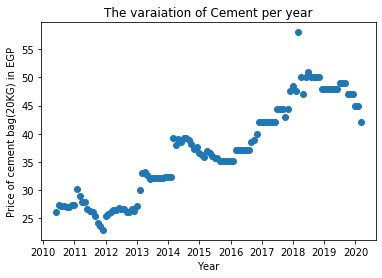

In [10]:
dates = matplotlib.dates.date2num(df['Date'])
matplotlib.pyplot.plot_date(dates, df['Cement']);
plt.ylabel('Price of cement bag(20KG) in EGP');
plt.xlabel('Year');
plt.title('The varaiation of Cement per year');

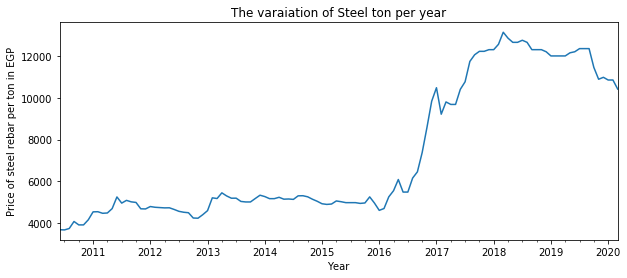

In [11]:
plt.figure(figsize=(10,4))
df.set_index(df['Date'], inplace=True) 
df['Steel'].plot()
plt.ylabel('Price of steel rebar per ton in EGP');
plt.xlabel('Year');
plt.title('The varaiation of Steel ton per year');

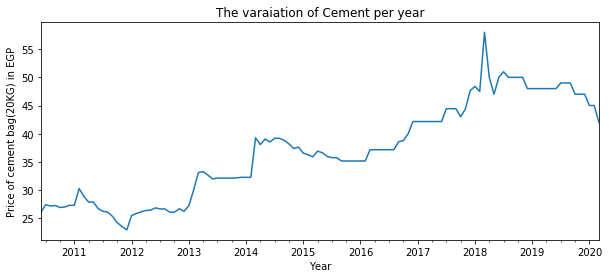

In [12]:
plt.figure(figsize=(10,4))
df.set_index(df['Date'], inplace=True) 
df['Cement'].plot()
plt.ylabel('Price of cement bag(20KG) in EGP');
plt.xlabel('Year');
plt.title('The varaiation of Cement per year');

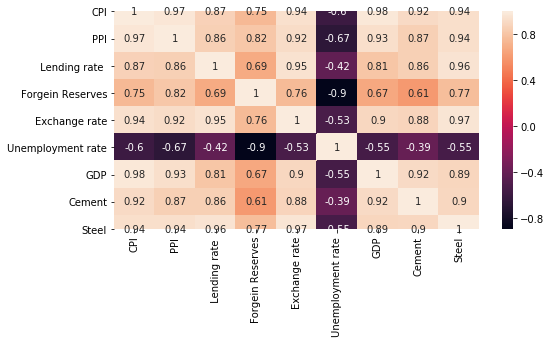

In [33]:
#correlation plot with 3 months lag
path = 'E:/Business Excellence/Bi Projects/PR and PO/Prices Predection/Model 3M lag.csv'
df= pd.read_csv(path)
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

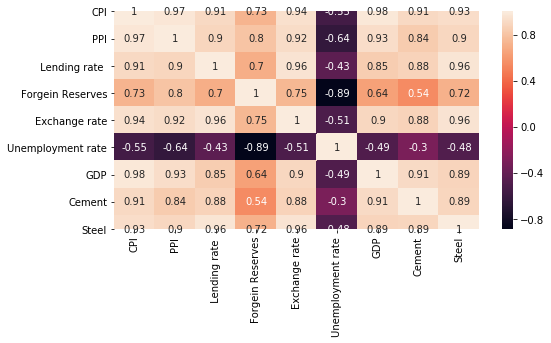

In [14]:
#correlation plot with 6 months lag
path = 'E:/Business Excellence/Bi Projects/PR and PO/Prices Predection/Model 6M lag.csv'
df= pd.read_csv(path)
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

> *the correlation plot show is still a very significant correlation despite the 6 months lag*<br>
<mark>therefore we will depend on the 6 months lag data to train our model to generate the best value for user</mark>

<a id='processing'></a>
## 2. Data Processing

In [6]:
path = 'E:/Business Excellence/Bi Projects/PR and PO/Prices Predection/Model 6M lag.csv'
df= pd.read_csv(path)
df

,Date,CPI,PPI,Lending rate,Forgein Reserves,Exchange rate,Unemployment rate,GDP,Cement,Steel
0,01-12-10,33.8,81.4,0.111,35221,5.687318,8.96,692.520000,27.30,4165
1,01-01-11,34.8,83.0,0.111,35278,5.707865,8.94,702.366667,27.30,4544
2,01-02-11,35.8,85.3,0.109,35527,5.702930,8.92,712.213333,30.27,4550
3,01-03-11,36.4,88.0,0.109,35534,5.712700,8.90,722.060000,28.86,4475
4,01-04-11,36.8,91.5,0.110,35545,5.736695,8.90,716.640000,27.87,4490
...,...,...,...,...,...,...,...,...,...,...
107,01-11-19,102.5,208.7,0.168,44275,17.083119,7.70,986.533333,47.00,10885
108,01-12-19,101.5,202.4,0.164,44481,16.795624,7.50,976.100000,47.00,10978
109,01-01-20,103.0,209.3,0.165,45037,16.666876,7.60,985.633333,45.00,10849
110,01-02-20,103.7,203.7,0.163,45090,16.633167,7.70,995.166667,45.00,10849


<a id='ML'></a>
## 3. ML Model

In [53]:
features = df.drop(['Cement','Steel','Date'],axis = 1)
labels = df['Steel']
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=101)

#### Import ML libraries

In [60]:
import sklearn
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
#Scoring Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
import sklearn.metrics as metrics
import joblib

In [69]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

#### 3.1 Gradian Boosting

In [103]:
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics as metrics
gb = GradientBoostingRegressor(random_state=0)

parameters = {
    'n_estimators': [5, 50,100, 250, 500],
    'max_depth': [1, 3, 5, 7, 9]
}

cv=GridSearchCV(gb,parameters,cv=5,scoring='neg_mean_absolute_error')
cv.fit(x_train,y_train.values.ravel())

model = cv.best_estimator_.fit(x_train, y_train)
print(metrics.mean_absolute_error(y_test, model.predict(x_test)))
print(metrics.r2_score(y_test, model.predict(x_test)))
print(metrics.mean_squared_log_error(y_test, model.predict(x_test)))
print(cv.best_params_)


219.294897064969
0.9891657797993892
0.001893850517371387
{'max_depth': 7, 'n_estimators': 250}


#### 3.2 Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
gb = RandomForestRegressor(random_state=0)

parameters = {
    'n_estimators': [5, 50,100, 250, 500],
    'max_depth': [1, 3, 5, 7, 9]
}

cv=GridSearchCV(gb,parameters,cv=5,scoring='neg_mean_absolute_error')
cv.fit(x_train,y_train.values.ravel())

model_RF = cv.best_estimator_.fit(x_train, y_train)
print(metrics.mean_absolute_error(y_test, model.predict(x_test)))
print(metrics.r2_score(y_test, model.predict(x_test)))
print(metrics.mean_squared_log_error(y_test, model.predict(x_test)))
print(cv.best_params_)


184.04429255489276
0.9933752152643961
0.0013141811636702115
{'max_depth': 9, 'n_estimators': 500}


In [62]:
joblib.dump(model_RF,'E:/Business Excellence/Bi Projects/PR and PO/Prices Predection/ML Model/RF.pkl')

['E:/Business Excellence/Bi Projects/PR and PO/Prices Predection/ML Model/RF.pkl']

#### 3.3 Decision Tree

In [108]:
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics
gb = DecisionTreeRegressor(random_state=0)

parameters = {
    'max_depth': [1, 3, 5, 7, 9,11,13]
}

cv=GridSearchCV(gb,parameters,cv=5,scoring='neg_mean_absolute_error')
cv.fit(x_train,y_train.values.ravel())

model = cv.best_estimator_.fit(x_train, y_train)
print(metrics.mean_absolute_error(y_test, model.predict(x_test)))
print(metrics.r2_score(y_test, model.predict(x_test)))
print(metrics.mean_squared_log_error(y_test, model.predict(x_test)))
print(cv.best_params_)

209.1408177408178
0.9902133228695853
0.001722733888825248
{'max_depth': 5}


#### 3.4 AdaBoostRegressor

In [115]:
from sklearn.ensemble import AdaBoostRegressor
import sklearn.metrics as metrics
gb = AdaBoostRegressor(random_state=0)

parameters = { 'n_estimators': [5, 50,100, 250, 500],
    'learning_rate':[0.01,0.1,1,10,100],
    'loss':['linear', 'square', 'exponential']
}

cv=GridSearchCV(gb,parameters,cv=5,scoring='neg_mean_absolute_error')
cv.fit(x_train,y_train.values.ravel())

model = cv.best_estimator_.fit(x_train, y_train)
print(metrics.mean_absolute_error(y_test, model.predict(x_test)))
print(metrics.r2_score(y_test, model.predict(x_test)))
print(metrics.mean_squared_log_error(y_test, model.predict(x_test)))
print(cv.best_params_)

231.76881709017937
0.986253987311554
0.002486299039011723
{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 500}


#### 3.5 Bagging Regressor

In [118]:
from sklearn.ensemble import BaggingRegressor
import sklearn.metrics as metrics
gb = BaggingRegressor(random_state=0)

parameters = { 'n_estimators': [5, 50,100, 250, 500],
}

cv=GridSearchCV(gb,parameters,cv=5,scoring='neg_mean_absolute_error')
cv.fit(x_train,y_train.values.ravel())

model = cv.best_estimator_.fit(x_train, y_train)
print(metrics.mean_absolute_error(y_test, model.predict(x_test)))
print(metrics.r2_score(y_test, model.predict(x_test)))
print(metrics.mean_squared_log_error(y_test, model.predict(x_test)))
print(cv.best_params_)

190.73470270270266
0.993102619797705
0.0013509016537904082
{'n_estimators': 250}


#### 3.6 MLP Regressor

In [124]:
from sklearn.neural_network import MLPRegressor
import sklearn.metrics as metrics
gb = MLPRegressor(random_state=0)

parameters = {
    'hidden_layer_sizes':[(10,), (50,), (100,)],
    'activation':['identity', 'logistic', 'tanh', 'relu'],
    'learning_rate':['constant','invscaling','adaptive']
}

cv=GridSearchCV(gb,parameters,cv=5,scoring='neg_mean_absolute_error')
cv.fit(x_train,y_train.values.ravel())

model = cv.best_estimator_.fit(x_train, y_train)
print(metrics.mean_absolute_error(y_test, model.predict(x_test)))
print(metrics.r2_score(y_test, model.predict(x_test)))
print(metrics.mean_squared_log_error(y_test, model.predict(x_test)))
print(cv.best_params_)

C:\Users\John.Tadros\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\John.Tadros\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\John.Tadros\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\John.Tadros\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stoch

1510.405387160414
0.4679596179179968
0.10236133399215876
{'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}


#### 3.7 SVM Regressor

In [16]:
from sklearn.svm import SVR
import sklearn.metrics as metrics
gb = SVR()

parameters = {
#    'kernel':['linear', 'poly', 'rbf']
}

cv=GridSearchCV(gb,parameters,cv=5,scoring='neg_mean_absolute_error')
cv.fit(x_train,y_train.values.ravel())

model = cv.best_estimator_.fit(x_train, y_train)
print(metrics.mean_absolute_error(y_test, model.predict(x_test)))
print(metrics.r2_score(y_test, model.predict(x_test)))
print(metrics.mean_squared_log_error(y_test, model.predict(x_test)))
print(cv.best_params_)

2178.1351351078474
-0.30181465120373985
0.19062178295539253
{}


#### 3.8 KNeighborsRegressor

In [15]:
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics as metrics
gb = KNeighborsRegressor()

parameters = {
#    'n_neighbors':['1', '5', '10'],
#    'leaf_size':['10','20']
}

cv=GridSearchCV(gb,parameters,cv=5,scoring='neg_mean_absolute_error')
cv.fit(x_train,y_train.values.ravel())

model = cv.best_estimator_.fit(x_train, y_train)
print(metrics.mean_absolute_error(y_test, model.predict(x_test)))
print(metrics.r2_score(y_test, model.predict(x_test)))
print(metrics.mean_squared_log_error(y_test, model.predict(x_test)))
print(cv.best_params_)

1231.681081081081
0.7118880375883221
0.06322340008149595
{}


> the Gradient Boosting and Random forest are basically the best performing models R2 = 0.989 & R2= 0.9933 Respectively

In [31]:
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
import sklearn.metrics as metrics

# split into inputs and outputs
X , y = df.iloc[:, 1:-2], df.iloc[:,-1]
# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', GradientBoostingRegressor( random_state=0))])
#max_depth = 5, n_estimators= 100
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))
#print(metrics.r2_score(y_test, model.predict(x_test)))

Mean MAE: 209.715


In [46]:
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
import sklearn.metrics as metrics

# split into inputs and outputs
X , y = df.iloc[:, 1:-2], df.iloc[:,-1]
# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', RandomForestRegressor (max_depth= 9, n_estimators= 500, random_state=0))])
#max_depth= 9, n_estimators= 500,
#max_depth = 5, n_estimators= 100
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 192.213


> The best performing model so far is the random forest without nomralizarion <br>
No lets check the features importance and if we can make reduce there no.

In [64]:
import joblib
feature_labels = ['CPI','PPI','Lending rate','Forgein Reserves','Exchange rate','Unemployment rate','GDP']

Forgein Reserves - 0.25%
Unemployment rate - 0.33%
GDP - 2.89%
Exchange rate - 7.73%
Lending rate - 18.36%
PPI - 32.23%
CPI - 38.22%


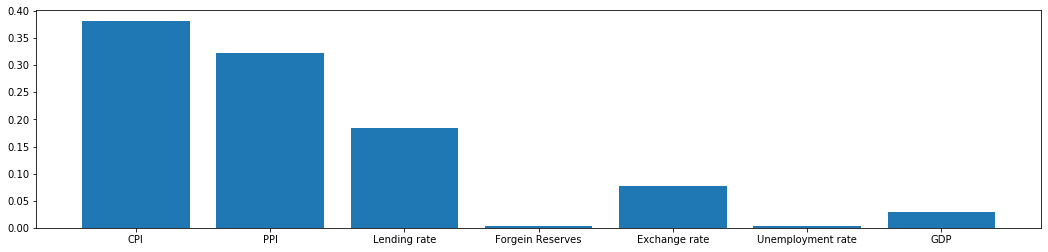

In [81]:
# Load the trained model created with train_model.py
model = joblib.load('E:/Business Excellence/Bi Projects/PR and PO/Prices Predection/ML Model/RF.pkl')

# Create a numpy array based on the model's feature importances
importance = model.feature_importances_

# Sort the feature labels based on the feature importance rankings from the model
feauture_indexes_by_importance = importance.argsort()

# Print each feature label, from most important to least important (reverse order)
for index in feauture_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))

# plot feature importance
plt.figure(figsize=(18,4))
plt.bar([i for i in feature_labels], importance)
plt.show()

<a id='Trial'></a>
## 4. 2019 Trail

In [65]:
#read the data excuding the last 3  months
df = path = 'E:/Business Excellence/Bi Projects/PR and PO/Prices Predection/Model 3M lag.csv'
df= pd.read_csv(path)
#Spilt train test
features = df.drop(['Cement','Steel','Date'],axis = 1)
labels = df['Steel']
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=101)
#Train the model
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
rf = RandomForestRegressor(random_state=0)

parameters = {
    'n_estimators': [5, 50,100, 250, 500],
    'max_depth': [1, 3, 5, 7, 9]
}

cv=GridSearchCV(rf,parameters,cv=5,scoring='neg_mean_absolute_error')
cv.fit(x_train,y_train.values.ravel())

model = cv.best_estimator_.fit(x_train, y_train)
print(metrics.mean_absolute_error(y_test, model.predict(x_test)))
print(metrics.r2_score(y_test, model.predict(x_test)))
print(metrics.mean_squared_log_error(y_test, model.predict(x_test)))
print(cv.best_params_)

213.9938936249937
0.9914925435300536
0.0028340402369808042
{'max_depth': 9, 'n_estimators': 250}


In [66]:
cv.best_estimator_
joblib.dump(model,'E:/Business Excellence/Bi Projects/PR and PO/Prices Predection/ML Model/RF4.pkl')

['E:/Business Excellence/Bi Projects/PR and PO/Prices Predection/ML Model/RF4.pkl']

In [62]:
#load the data to be predicted
df= pd.read_csv('E:/Business Excellence/Bi Projects/PR and PO/Prices Predection/Model 3M lag - to be predicted.csv')

df.iloc[0, 1:-1]

CPI                    105.1
PPI                    201.4
 Lending rate          0.147
Forgein Reserves       45247
Exchange rate        16.2842
Unemployment rate    7.86667
GDP                  1011.27
Name: 0, dtype: object

In [146]:
row = 10
Indicators_to_value = x_test.iloc[row-1, 0:].values.flatten().tolist()
Indicators_to_value = [Indicators_to_value]
print(Indicators_to_value)
print(y_test.iloc[row-1])

[[101.2, 203.4, 0.171, 44112.0, 17.44587619, 8.1, 1007.4]]
12350


In [67]:
#Load the model
model = joblib.load('E:/Business Excellence/Bi Projects/PR and PO/Prices Predection/ML Model/RF4.pkl')

In [147]:
# Run the model and make a prediction for each house in the homes_to_value array
Steel_price = model.predict(Indicators_to_value)

# Since we are only predicting the price of one house, just look at the first prediction returned
predicted_value = Steel_price[0]

print("This steel price has an estimated value of EGP {:,.2f}".format(predicted_value))

This steel price has an estimated value of EGP 12,240.23


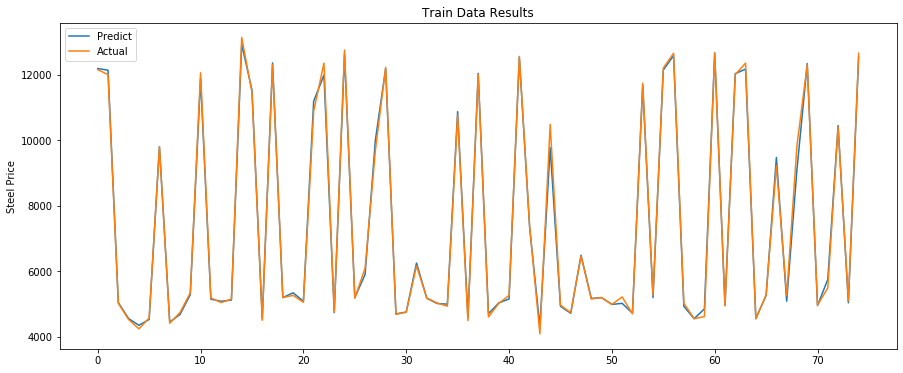

In [20]:
predict = []

for row in range(x_train.shape[0]):
    Indicators_to_value = x_train.iloc[row, 0:].values.flatten().tolist()
    Indicators_to_value = [Indicators_to_value]
    Steel_price = model.predict(Indicators_to_value)
    #predicted_value = Steel_price[0]
    predict.append(Steel_price[0])
    actual=y_train.to_list()
    #print(Indicators_to_value)
    #print(y_train.iloc[row-1])
    #print(predicted_value)
    #print(abs((y_test.iloc[row-1])-predicted_value))
plt.figure(figsize=(15,6))
plt.plot(predict, label = "Predict")
plt.plot(actual, label = "Actual")
plt.legend()
plt.ylabel('Steel Price')
plt.title('Train Data Results')
plt.show()

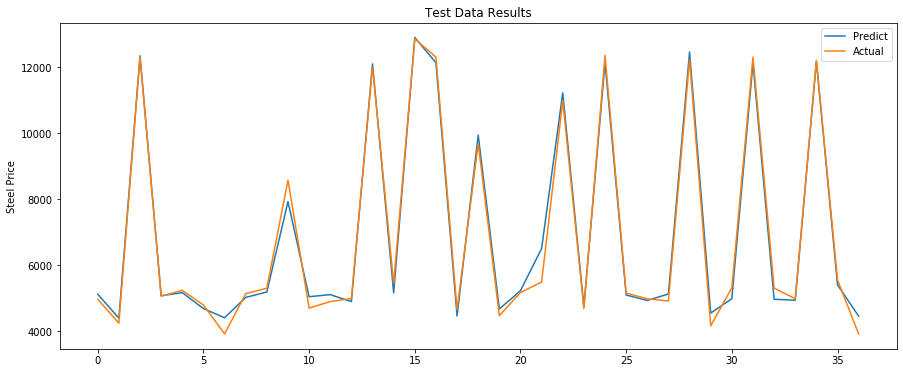

In [21]:
predict = []

for row in range(x_test.shape[0]):
    Indicators_to_value = x_test.iloc[row, 0:].values.flatten().tolist()
    Indicators_to_value = [Indicators_to_value]
    Steel_price = model.predict(Indicators_to_value)
    #predicted_value = Steel_price[0]
    predict.append(Steel_price[0])
    actual=y_test.to_list()
    #print(Indicators_to_value)
    #print(y_train.iloc[row-1])
    #print(predicted_value)
    #print(abs((y_test.iloc[row-1])-predicted_value))
plt.figure(figsize=(15,6))
plt.plot(predict, label = "Predict")
plt.plot(actual, label = "Actual")
plt.legend()
plt.ylabel('Steel Price')
plt.title('Test Data Results')
plt.show()

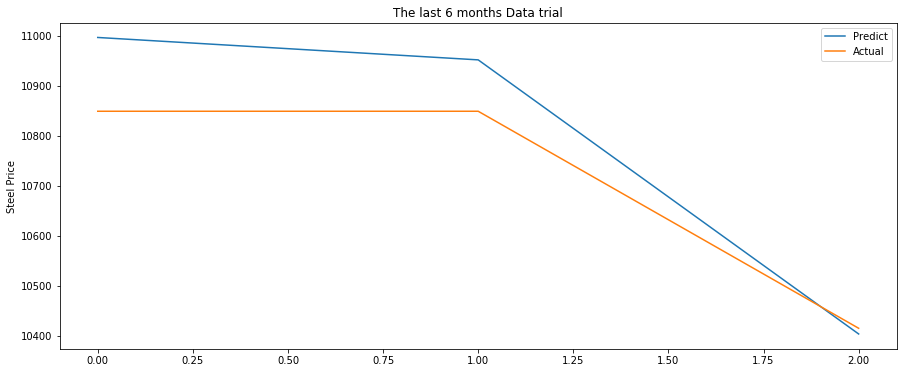

In [64]:
predict = []
df= pd.read_csv('E:/Business Excellence/Bi Projects/PR and PO/Prices Predection/Model 3M lag - to be predicted.csv')
for row in range(df.shape[0]):
    Indicators_to_value = df.iloc[row, 1:-1].values.flatten().tolist()
    Indicators_to_value = [Indicators_to_value]
    Steel_price = model.predict(Indicators_to_value)
    #predicted_value = Steel_price[0]
    predict.append(Steel_price[0])
    actual=df.iloc[:,-1].to_list()
    #print(Indicators_to_value)
    #print(y_train.iloc[row-1])
    #print(predicted_value)
    #print(abs((y_test.iloc[row-1])-predicted_value))
plt.figure(figsize=(15,6))
plt.plot(predict, label = "Predict")
plt.plot(actual, label = "Actual")
plt.legend()
plt.ylabel('Steel Price')
plt.title('The last 6 months Data trial')
plt.show()